In [1]:
import os, time, itertools, sys
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
import matplotlib.pyplot as plt
import seaborn as sns
import multiprocessing as mp
from copy import deepcopy
from pybaseball import *
sys.path.append('/home/dcooper/rockies/RockiesAnalysis/')
from utils.plotting.spray_chart import *
from utils.analysis.get_expected_outcomes import get_expected_outcomes

/home/dcooper/anaconda3/envs/rockies/lib/python3.13/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


## Get batted ball data

In [2]:
exp_outcomes, all_BIP_data, ev_labels, la_labels, sa_labels = get_expected_outcomes()

In [3]:
exp_outcomes

,EV,LA,SA,ΔHR,Δ3B,Δ2B,Δ1B,ΔOut,Bases_nCoors,Bases_Coors,ΔBases,n_Coors
0,<80,<10°,-45 to -27°,0.00,-0.00,-0.01,0.03,-0.03,0.04,0.03,0.02,819
1,<80,<10°,-27 to -9°,0.00,0.00,-0.00,-0.01,0.01,0.00,0.00,-0.01,669
2,<80,<10°,-9 to 9°,0.00,0.00,-0.00,0.01,-0.00,0.00,0.00,0.00,377
3,<80,<10°,9 to 27°,0.00,0.00,0.00,0.01,-0.01,0.00,0.00,0.01,520
4,<80,<10°,27 to 45°,0.00,-0.00,0.00,0.01,-0.01,0.02,0.02,0.01,858
5,<80,10-25°,-45 to -27°,0.00,0.01,-0.02,0.02,-0.00,0.30,0.28,-0.01,159
6,<80,10-25°,-27 to -9°,0.00,-0.00,-0.00,0.02,-0.02,0.01,0.00,0.01,143
7,<80,10-25°,-9 to 9°,0.00,-0.00,-0.00,0.08,-0.08,0.00,0.00,0.08,183
8,<80,10-25°,9 to 27°,0.00,0.00,0.00,-0.02,0.02,0.00,0.01,-0.01,161
9,<80,10-25°,27 to 45°,0.00,0.00,0.03,-0.06,0.03,0.20,0.27,0.01,156


## pCBB

In [44]:
def get_player_dfs(last_name=None, first_name=None, player_id=None, year=2025, home_team='COL', not_home_team=None):
    
    # Get Player ID
    if player_id is None:
        if last_name == 'Bell':
            player_id = playerid_lookup(last_name, first_name, ignore_accents=True)['key_mlbam'][1]
        else:
            player_id = playerid_lookup(last_name, first_name, ignore_accents=True)['key_mlbam'][0]

    # Add filters
    player_df = all_BIP_data.loc[all_BIP_data['batter'] == player_id]
    if year is not None:
        player_df = player_df.loc[player_df['game_year'] == year]
    if home_team is not None:
        player_df = player_df.loc[player_df['home_team'] == home_team]
    if not_home_team is not None:
        player_df = player_df.loc[player_df['home_team'] != not_home_team]
    player_df = player_df.loc[player_df['events'] != 'force_out']
    assert player_df.shape[0] > 0

    print(f'Found {player_df.shape[0]} batted balls for {first_name} {last_name}')

    # Iterate through contact bins and add to player_df
    player_contact = pd.DataFrame(columns=['EV', 'LA', 'SA', 'count', 'ΔHR', 'Δ3B', 'Δ2B', 'Δ1B', 'ΔOut', 'ΔBases'])
    for i, ev_label in enumerate(ev_labels):
        for j, la_label in enumerate(la_labels):
            for k, sa_label in enumerate(sa_labels):
                count = player_df.loc[player_df['launch_speed_bin'] == ev_label].loc[player_df['launch_angle_bin'] == la_label].loc[player_df['spray_angle_bin'] == sa_label].shape[0]
                prob = count / player_df.shape[0]
                d_outcome = exp_outcomes.loc[exp_outcomes['EV'] == ev_label].loc[exp_outcomes['LA'] == la_label].loc[exp_outcomes['SA'] == sa_label]
                if d_outcome.shape[0] > 0:
                    d_outcome = d_outcome[['ΔHR', 'Δ3B', 'Δ2B', 'Δ1B', 'ΔOut', 'ΔBases']].to_numpy()[0]                
                else:
                    d_outcome = np.zeros(6)  
                player_contact.loc[player_contact.shape[0]] = [ev_label, la_label, sa_label, count] + list(d_outcome * prob)

    # Sort
    player_contact = player_contact.sort_values('ΔBases', ascending=False)
    player_contact = player_contact.reset_index(drop=True)

    return player_contact, player_df

def get_statcast_batter(last_name, first_name, start_date='2025-03-27', end_date='2025-09-28'):
    count = 10
    while count > 0:
        try:
            if last_name == 'Bell':
                player_id = playerid_lookup(last_name, first_name, ignore_accents=True)['key_mlbam'][1]
            else:
                player_id = playerid_lookup(last_name, first_name, ignore_accents=True)['key_mlbam'][0]            
            player_data = statcast_batter(start_dt=start_date, end_dt=end_date, player_id=player_id)
            count = 0
        except:
            if count == 1:
                raise Exception(r['last'], r['first'])
            else:
                count -= 1

    player_data = player_data.loc[player_data['events'] != 'force_out']
    return player_data

In [5]:
first_base_free_agents = np.array([
    ['Johnston', 'Troy', 1.01, 820000],
    ['Crim', 'Blaine', 1.13, 820000],
    ['Alonso', 'Pete', 0.96, 31000000],
    ['Naylor', 'Josh', 1, 18500000],
    ["O'Hearn", 'Ryan', 0.96, 14500000],
    ['Santana', 'Carlos', 1, 12000000],
    ['Lowe', 'Nathaniel', 1, 10700000],
    ['Arraez', 'Luis', 0.96, 14110202],
    ['Goldschmidt', 'Paul', 0.99, 7175951],
    ['Hoskins', 'Rhys', 0.99, 7009366],
    ['Turner', 'Justin', 0.98, 6000000],
    ['Solano', 'Donovan', 0.94, 3500000],
    ['Smith', 'Dominic', 0.97, 943548],
    ['Bell', 'Josh', 1, 7000000],
    ['France', 'Ty', 1.0, 1666178],
    ['Wade', 'LaMonte', 0.97, 5000000],
    ['Tellez', 'Rowdy', 0.94, 1500000],
    ['Flores', 'Wilmer', 0.97, 2027455],
    ['Toglia', 'Michael', 1.13, 820000],
    ['Casas', 'Triston', 1.04, 1000000]
])

In [6]:
# Methods
def get_wOBA(single, double, triple, home_run, BB, IBB, HBP, AB, SF=0):
    return (0.691*(BB-IBB) + 0.722*HBP + 0.882*single + 1.252*double + 1.584*triple + 2.037*home_run) / (AB + BB - IBB + SF + HBP)

def get_wRAA(wOBA, PA=502, lgwOBA=0.314, wOBA_scale=1.232):
    return PA * ((wOBA - lgwOBA) / wOBA_scale)

def get_batting_runs(wRAA, PA, lPA=91666, lgR=10817, PF=1.13, lwRC=10864):
    return wRAA + ((lgR/lPA) - (PF*lgR/lPA)) * PA + ((lgR/lPA) - (lwRC/lPA)) * PA


In [51]:
first_basemen_CBB = pd.DataFrame(columns=['First', 'Last', 'ΔHR', 'Δ3B', 'Δ2B', 'Δ1B', 'ΔOut', 'CBB', 'BIP'])
first_basemen_pCBB = pd.DataFrame(columns=['First', 'Last', 'pBIP', 'pCBB', 'pwOBA', 'pwRAA', 'pBattingRuns', 'pBattingWAR', 'p1B', 'p2B', 'p3B', 'pHR', 'pBB', 'pIBB', 'pHBP', 'pSO', 'MV (mill.)', 'MV (mill.)/wRAA'])
first_basemen_dCBB = pd.DataFrame(columns=['First', 'Last', 'dwOBA', 'dwRAA', 'dBattingRuns', 'dBattingWAR', 'd1B', 'd2B', 'd3B', 'dHR'])

for last, first, PF, MV in first_base_free_agents:
    
    # Load data
    try:
        if last == 'Casas':
            year = 2023
        else:
            year = 2025
        batter_CBB, batter_bb = get_player_dfs(last, first, home_team=None, year=year)
        if last == 'Casas':
            batter_data = get_statcast_batter(last, first, start_date='2023-03-27', end_date='2023-10-02')
        else:
            batter_data = get_statcast_batter(last, first)
    except:
        print(f'Failed for {last}, {first}')

    # Check for >= 100 batted balls
    if batter_CBB['count'].sum() >= 100 or last in ['Johnston', 'Crim', 'Casas']:

        # Get CBB 
        CBB = batter_CBB['ΔBases'].sum(axis=0)

        # Get events
        player_events = batter_data['events'].dropna().to_numpy()
        PA = len(player_events[player_events != 'truncated_pa'])
        AB = len(player_events[~np.isin(player_events, np.array(['sac_fly', 'walk', 'intent_walk' 'hit_by_pitch', 'truncated_pa', 'catcher_interf', 'field_error', 'fielders_choice']))])
        BB = len(player_events[np.isin(player_events, np.array(['walk', 'intent_walk']))])
        IBB = len(player_events[player_events == 'intent_walk'])
        SO = len(player_events[player_events == 'strikeout'])
        HBP = len(player_events[player_events == 'hit_by_pitch'])
        SF = len(player_events[player_events == 'sac_fly'])
        singles = len(player_events[player_events == 'single'])
        doubles = len(player_events[player_events == 'double'])
        triples = len(player_events[player_events == 'triple'])
        home_runs = len(player_events[player_events == 'home_run'])      

        # Get value
        wOBA = get_wOBA(singles, doubles, triples, home_runs, BB, IBB, HBP, AB, SF)
        wRAA = get_wRAA(wOBA, PA=PA)
        BattingRuns = get_batting_runs(wRAA, PA=PA, PF=float(PF))
        BattingWAR = BattingRuns / 9.774

        # Get BIP
        BIP = (PA - (SO + BB + HBP)) / PA
        
        # Get pBIP
        c_pBIP = (BIP + 0.0409) * 251
        nc_pBIP = (BIP) * 251
        pBIP = c_pBIP + nc_pBIP
            
        # Get pCBB
        pCBB = CBB * c_pBIP

        # Get pOutcomes
        if last in ['Toglia', 'Crim']:
            p1B = pBIP * ((singles / (BIP * PA))) 
            p2B = pBIP * ((doubles / (BIP * PA))) 
            p3B = pBIP * ((triples / (BIP * PA))) 
            pHR = pBIP * ((home_runs / (BIP * PA))) 
        else:
            p1B = c_pBIP * ((singles / (BIP * PA)) + batter_CBB['Δ1B'].sum(axis=0)) + nc_pBIP * (singles / (BIP * PA))
            p2B = c_pBIP * ((doubles / (BIP * PA)) + batter_CBB['Δ2B'].sum(axis=0)) + nc_pBIP * (doubles / (BIP * PA))
            p3B = c_pBIP * ((triples / (BIP * PA)) + batter_CBB['Δ3B'].sum(axis=0)) + nc_pBIP * (triples / (BIP * PA))
            pHR = c_pBIP * ((home_runs / (BIP * PA)) + batter_CBB['ΔHR'].sum(axis=0)) + nc_pBIP * (home_runs / (BIP * PA))
        pBB = 502 * (BB / PA)
        pIBB = 502 * (IBB / PA)
        pHBP = 502 * (HBP / PA)
        pAB = 502 - pBB - pHBP
        pSO = 502 * (SO / PA)

        # Get projected value
        pwOBA = get_wOBA(p1B, p2B, p3B, pHR, pBB, pIBB, pHBP, pAB)
        pwRAA = get_wRAA(pwOBA, PA=502)
        pBattingRuns = get_batting_runs(pwRAA, PA=502)
        pBattingWAR = pBattingRuns / 9.774
        
        # Get dOutcomes
        d1B = 502 * ((p1B/502) - (singles/PA))
        d2B = 502 * ((p2B/502) - (doubles/PA))
        d3B = 502 * ((p3B/502) - (triples/PA))
        dHR = 502 * ((pHR/502) - (home_runs/PA))
        dBB = 502 * ((pBB/502) - (BB/PA))
        dIBB = 502 * ((pIBB/502) - (IBB/PA))
        dHBP = 502 * ((pHBP/502) - (HBP/PA))

        # Get detla value
        dwOBA = pwOBA - wOBA
        dwRAA = pwRAA - wRAA
        dBattingRuns = pBattingRuns - BattingRuns
        dBattingWAR = pBattingWAR - BattingWAR

        print('wOBA', dwOBA, pwOBA, wOBA)
        print('wRAA', dwRAA, pwRAA, wRAA)
        print('BR', dBattingRuns, pBattingRuns, BattingRuns)
        print('BW', dBattingWAR, pBattingWAR, BattingWAR)
        print()
        
        # Get financials
        MV = float(MV) * 1e-6
        MV_per_wRAA = MV / pwRAA
        
        # Add to df
        first_basemen_CBB.loc[first_basemen_CBB.shape[0]] = [first, last] + batter_CBB[['ΔHR', 'Δ3B', 'Δ2B', 'Δ1B', 'ΔOut']].sum(axis=0).to_list() + [CBB, BIP]
        first_basemen_pCBB.loc[first_basemen_pCBB.shape[0]] = [first, last, pBIP, pCBB, pwOBA, pwRAA, pBattingRuns, pBattingWAR, p1B, p2B, p3B, pHR, pBB, pIBB, pHBP, pSO, MV, MV_per_wRAA]
        first_basemen_dCBB.loc[first_basemen_pCBB.shape[0]] = [first, last, dwOBA, dwRAA, dBattingRuns, dBattingWAR, d1B, d2B, d3B, dHR]

    else:
        print('>>skipping', last, first)


Found 85 batted balls for Troy Johnston
Gathering Player Data
wOBA 0.025339779397007378 0.35305878766147014 0.32771900826446276
wRAA 14.567785232189948 15.91518782959254 1.3474025974025927
BR 6.814246842819847 7.956823550579604 1.1425767077597573
BW 0.6971809743011917 0.8140805760773077 0.11689960177611596

Found 39 batted balls for Blaine Crim
Gathering Player Data
wOBA 0.013545435654885696 0.31819876898821897 0.3046533333333333
wRAA 2.2722689654377115 1.7108620390307818 -0.5614069264069299
BR -4.512949981609173 -6.247502239982154 -1.7345522583729802
BW -0.46173009838440493 -0.6391960548375439 -0.17746595645313898

Found 455 batted balls for Pete Alonso
Gathering Player Data
wOBA 0.02970997320838309 0.3958512161462362 0.3661412429378531
wRAA 3.9376190451320348 33.35171307257352 29.414094027441482
BR -6.9449221369856495 25.39334879356058 32.33827093054623
BW -0.7105506585825299 2.5980508280704506 3.3086014866529805

Found 460 batted balls for Josh Naylor
Gathering Player Data
wOBA 0.02

In [52]:
styled_df = first_basemen_CBB.sort_values('CBB', ascending=False)
styled_df[['ΔHR', 'Δ3B', 'Δ2B', 'Δ1B', 'ΔOut', 'CBB', 'BIP']] *= 100
styled_df.columns = ['First', 'Last', 'CBHR', 'CB3B', 'CB2B', 'CB1B', 'CBOut', 'CBB', 'BIP']
styled_df = styled_df.style.format(precision=2).background_gradient(
    cmap='bwr',
    vmin=0,
    vmax=styled_df['CBHR'].max(),
    subset=['CBHR']
).background_gradient(
    cmap='bwr',
    vmin=0,
    vmax=styled_df['CB3B'].max(),
    subset=['CB3B']
).background_gradient(
    cmap='bwr',
    vmin=0,
    vmax=styled_df['CB2B'].max(),
    subset=['CB2B']
).background_gradient(
    cmap='bwr',
    vmin=0,
    vmax=styled_df['CB1B'].max(),
    subset=['CB1B']
).background_gradient(
    cmap='bwr',
    vmin=styled_df['CBOut'].min(),
    vmax=0,
    subset=['CBOut']
).background_gradient(
    cmap='bwr',
    vmin=0,
    vmax=styled_df['CBB'].max(),
    subset=['CBB']
).background_gradient(
    cmap='bwr',
    vmin=0,
    vmax=styled_df['BIP'].max(),
    subset=['BIP']
)
styled_df

,First,Last,CBHR,CB3B,CB2B,CB1B,CBOut,CBB,BIP
1,Blaine,Crim,0.38,0.92,1.69,0.90,-3.90,8.44,52.70
9,Rhys,Hoskins,1.02,0.46,0.69,0.85,-2.95,7.39,59.45
0,Troy,Johnston,0.18,0.80,1.05,1.92,-3.80,6.92,71.07
11,Donovan,Solano,0.69,0.50,1.15,0.44,-2.77,6.90,71.02
12,Dominic,Smith,0.29,0.62,1.13,1.04,-3.10,6.23,73.99
4,Ryan,O'Hearn,0.42,0.48,0.87,1.44,-3.13,6.08,67.41
16,Rowdy,Tellez,0.42,0.62,0.74,1.26,-2.94,6.08,66.67
10,Justin,Turner,0.20,0.74,1.26,0.80,-2.92,6.08,70.97
19,Triston,Casas,0.42,0.48,0.88,1.05,-2.78,5.81,60.79
17,Wilmer,Flores,0.83,0.36,0.43,0.71,-2.21,5.72,72.17


In [53]:
styled_df = first_basemen_pCBB.sort_values('pwRAA', ascending=False)
styled_df = styled_df.style.format({
    'pBIP': '{:.1f}',
    'pCBB': '{:.2f}',
    'pwOBA': '{:.3f}',
    'pwRAA': '{:.1f}',
    'pBattingRuns': '{:.1f}',
    'pBattingWAR': '{:.1f}',
    'p1B': '{:.1f}',
    'p2B': '{:.1f}',
    'p3B': '{:.1f}',
    'pHR': '{:.1f}',
    'pBB': '{:.1f}',
    'pIBB': '{:.1f}',
    'pHBP': '{:.1f}',
    'pSO': '{:.1f}',
    'MV (mill.)': '{:.3f}',
    'MV (mill.)/wRAA': '{:.3f}',
}).background_gradient(
    cmap='bwr',
    vmin=0,
    vmax=styled_df['pBIP'].max(),
    subset=['pBIP']
).background_gradient(
    cmap='bwr',
    vmin=0,
    vmax=styled_df['pCBB'].max(),
    subset=['pCBB']
).background_gradient(
    cmap='bwr',
    vmin=styled_df['pwOBA'].min(),
    vmax=styled_df['pwOBA'].max(),
    subset=['pwOBA']
).background_gradient(
    cmap='bwr',
    vmin=-np.abs(styled_df['pwRAA']).max(),
    vmax=np.abs(styled_df['pwRAA']).max(),
    subset=['pwRAA']
).background_gradient(
    cmap='bwr',
    vmin=-np.abs(styled_df['pBattingRuns']).max(),
    vmax=np.abs(styled_df['pBattingRuns']).max(),
    subset=['pBattingRuns']
).background_gradient(
    cmap='bwr',
    vmin=-np.abs(styled_df['pBattingWAR']).max(),
    vmax=np.abs(styled_df['pBattingWAR']).max(),
    subset=['pBattingWAR']
).background_gradient(
    cmap='bwr',
    vmin=-styled_df['p1B'].max(),
    vmax=styled_df['p1B'].max(),
    subset=['p1B']
).background_gradient(
    cmap='bwr',
    vmin=-styled_df['p2B'].max(),
    vmax=styled_df['p2B'].max(),
    subset=['p2B']
).background_gradient(
    cmap='bwr',
    vmin=-styled_df['p3B'].max(),
    vmax=styled_df['p3B'].max(),
    subset=['p3B']
).background_gradient(
    cmap='bwr',
    vmin=-styled_df['pHR'].max(),
    vmax=styled_df['pHR'].max(),
    subset=['pHR']
).background_gradient(
    cmap='bwr',
    vmin=-styled_df['pBB'].max(),
    vmax=styled_df['pBB'].max(),
    subset=['pBB']
).background_gradient(
    cmap='bwr',
    vmin=-styled_df['pIBB'].max(),
    vmax=styled_df['pIBB'].max(),
    subset=['pIBB']
).background_gradient(
    cmap='bwr',
    vmin=-styled_df['pHBP'].max(),
    vmax=styled_df['pHBP'].max(),
    subset=['pHBP']
).background_gradient(
    cmap='bwr',
    vmin=-styled_df['pSO'].max(),
    vmax=styled_df['pSO'].max(),
    subset=['pSO']
).background_gradient(
    cmap='bwr',
    vmin=0,
    vmax=styled_df['MV (mill.)'].max(),
    subset=['MV (mill.)']
).background_gradient(
    cmap='bwr',
    vmin=0,
    vmax=styled_df['MV (mill.)/wRAA'].max(),
    subset=['MV (mill.)/wRAA']
)


styled_df

,First,Last,pBIP,pCBB,pwOBA,pwRAA,pBattingRuns,pBattingWAR,p1B,p2B,p3B,pHR,pBB,pIBB,pHBP,pSO,MV (mill.),MV (mill.)/wRAA
2,Pete,Alonso,340.4,8.86,0.396,33.4,25.4,2.6,67.8,32.1,1.8,28.8,44.1,3.6,10.8,117.0,31.000,0.929
19,Triston,Casas,315.4,9.47,0.392,31.6,23.6,2.4,69.5,23.0,2.8,26.4,69.6,2.0,1.0,126.2,1.000,0.032
4,Ryan,O'Hearn,348.7,10.92,0.376,25.4,17.4,1.8,93.1,21.8,1.8,17.1,54.2,3.7,7.5,101.9,14.500,0.571
3,Josh,Naylor,399.5,11.28,0.373,24.0,16.0,1.6,96.8,27.6,2.1,17.1,40.1,3.3,3.3,69.3,18.500,0.772
0,Troy,Johnston,367.1,13.05,0.353,15.9,8.0,0.8,106.1,10.5,5.8,17.4,33.2,0.0,4.1,107.9,0.820,0.052
12,Dominic,Smith,381.7,12.21,0.351,15.1,7.1,0.7,96.9,30.0,1.2,12.1,33.8,0.0,4.5,92.3,0.944,0.062
13,Josh,Bell,370.3,9.88,0.347,13.5,5.5,0.6,72.6,17.1,2.3,21.9,54.3,1.0,4.8,82.9,7.000,0.519
9,Rhys,Hoskins,308.7,11.78,0.347,13.2,5.3,0.5,66.3,20.1,2.3,20.6,58.2,3.1,7.7,137.7,7.009,0.529
8,Paul,Goldschmidt,379.4,10.07,0.338,9.6,1.6,0.2,91.5,31.9,2.2,10.2,34.2,4.7,3.8,94.9,7.176,0.747
7,Luis,Arraez,469.0,8.78,0.333,7.6,-0.4,-0.0,111.4,24.0,4.0,6.6,25.8,0.0,1.5,15.9,14.110,1.855


In [54]:
styled_df = first_basemen_pCBB.loc[first_basemen_pCBB['MV (mill.)/wRAA'] > 0].sort_values('MV (mill.)/wRAA', ascending=True)
styled_df = styled_df.style.format({
    'pBIP': '{:.1f}',
    'pCBB': '{:.2f}',
    'pwOBA': '{:.3f}',
    'pwRAA': '{:.1f}',
    'pBattingRuns': '{:.1f}',
    'pBattingWAR': '{:.1f}',
    'p1B': '{:.1f}',
    'p2B': '{:.1f}',
    'p3B': '{:.1f}',
    'pHR': '{:.1f}',
    'pBB': '{:.1f}',
    'pIBB': '{:.1f}',
    'pHBP': '{:.1f}',
    'pSO': '{:.1f}',
    'MV (mill.)': '{:.3f}',
    'MV (mill.)/wRAA': '{:.3f}',
}).background_gradient(
    cmap='bwr',
    vmin=0,
    vmax=styled_df['pBIP'].max(),
    subset=['pBIP']
).background_gradient(
    cmap='bwr',
    vmin=0,
    vmax=first_basemen_pCBB['pCBB'].max(),
    subset=['pCBB']
).background_gradient(
    cmap='bwr',
    vmin=first_basemen_pCBB['pwOBA'].min(),
    vmax=first_basemen_pCBB['pwOBA'].max(),
    subset=['pwOBA']
).background_gradient(
    cmap='bwr',
    vmin=-np.abs(first_basemen_pCBB['pwRAA']).max(),
    vmax=np.abs(first_basemen_pCBB['pwRAA']).max(),
    subset=['pwRAA']
).background_gradient(
    cmap='bwr',
    vmin=-np.abs(first_basemen_pCBB['pBattingRuns']).max(),
    vmax=np.abs(first_basemen_pCBB['pBattingRuns']).max(),
    subset=['pBattingRuns']
).background_gradient(
    cmap='bwr',
    vmin=-np.abs(first_basemen_pCBB['pBattingWAR']).max(),
    vmax=np.abs(first_basemen_pCBB['pBattingWAR']).max(),
    subset=['pBattingWAR']
).background_gradient(
    cmap='bwr',
    vmin=-first_basemen_pCBB['p1B'].max(),
    vmax=first_basemen_pCBB['p1B'].max(),
    subset=['p1B']
).background_gradient(
    cmap='bwr',
    vmin=-first_basemen_pCBB['p2B'].max(),
    vmax=first_basemen_pCBB['p2B'].max(),
    subset=['p2B']
).background_gradient(
    cmap='bwr',
    vmin=-first_basemen_pCBB['p3B'].max(),
    vmax=first_basemen_pCBB['p3B'].max(),
    subset=['p3B']
).background_gradient(
    cmap='bwr',
    vmin=-first_basemen_pCBB['pHR'].max(),
    vmax=first_basemen_pCBB['pHR'].max(),
    subset=['pHR']
).background_gradient(
    cmap='bwr',
    vmin=-first_basemen_pCBB['pBB'].max(),
    vmax=first_basemen_pCBB['pBB'].max(),
    subset=['pBB']
).background_gradient(
    cmap='bwr',
    vmin=-first_basemen_pCBB['pIBB'].max(),
    vmax=first_basemen_pCBB['pIBB'].max(),
    subset=['pIBB']
).background_gradient(
    cmap='bwr',
    vmin=-first_basemen_pCBB['pHBP'].max(),
    vmax=first_basemen_pCBB['pHBP'].max(),
    subset=['pHBP']
).background_gradient(
    cmap='bwr',
    vmin=-first_basemen_pCBB['pSO'].max(),
    vmax=first_basemen_pCBB['pSO'].max(),
    subset=['pSO']
).background_gradient(
    cmap='bwr',
    vmin=0,
    vmax=first_basemen_pCBB['MV (mill.)'].max(),
    subset=['MV (mill.)']
).background_gradient(
    cmap='bwr',
    vmin=0,
    vmax=first_basemen_pCBB['MV (mill.)/wRAA'].max(),
    subset=['MV (mill.)/wRAA']
)


styled_df

,First,Last,pBIP,pCBB,pwOBA,pwRAA,pBattingRuns,pBattingWAR,p1B,p2B,p3B,pHR,pBB,pIBB,pHBP,pSO,MV (mill.),MV (mill.)/wRAA
19,Triston,Casas,315.4,9.47,0.392,31.6,23.6,2.4,69.5,23.0,2.8,26.4,69.6,2.0,1.0,126.2,1.000,0.032
0,Troy,Johnston,367.1,13.05,0.353,15.9,8.0,0.8,106.1,10.5,5.8,17.4,33.2,0.0,4.1,107.9,0.820,0.052
12,Dominic,Smith,381.7,12.21,0.351,15.1,7.1,0.7,96.9,30.0,1.2,12.1,33.8,0.0,4.5,92.3,0.944,0.062
16,Rowdy,Tellez,344.9,10.80,0.332,7.3,-0.6,-0.1,65.9,19.7,1.1,29.2,27.6,0.0,4.9,134.8,1.500,0.205
14,Ty,France,381.0,9.53,0.326,4.7,-3.2,-0.3,88.6,29.4,1.3,7.5,22.9,1.0,21.9,86.4,1.666,0.351
1,Blaine,Crim,274.8,12.03,0.318,1.7,-6.2,-0.6,42.3,14.1,0.0,35.2,40.7,0.0,6.8,189.9,0.820,0.479
17,Wilmer,Flores,372.6,10.95,0.324,4.0,-3.9,-0.4,85.5,12.0,0.7,19.6,37.1,0.0,7.6,94.9,2.027,0.504
13,Josh,Bell,370.3,9.88,0.347,13.5,5.5,0.6,72.6,17.1,2.3,21.9,54.3,1.0,4.8,82.9,7.000,0.519
9,Rhys,Hoskins,308.7,11.78,0.347,13.2,5.3,0.5,66.3,20.1,2.3,20.6,58.2,3.1,7.7,137.7,7.009,0.529
4,Ryan,O'Hearn,348.7,10.92,0.376,25.4,17.4,1.8,93.1,21.8,1.8,17.1,54.2,3.7,7.5,101.9,14.500,0.571


In [55]:
styled_df = first_basemen_dCBB.sort_values('dBattingWAR', ascending=False)
styled_df = styled_df.style.format({
    'dwOBA': '{:.3f}',
    'dwRAA': '{:.1f}',
    'dBattingRuns': '{:.1f}',
    'dBattingWAR': '{:.1f}',
    'd1B': '{:.1f}',
    'd2B': '{:.1f}',
    'd3B': '{:.1f}',
    'dHR': '{:.1f}',
}).background_gradient(
    cmap='bwr',
    vmin=styled_df['dwOBA'].min(),
    vmax=styled_df['dwOBA'].max(),
    subset=['dwOBA']
).background_gradient(
    cmap='bwr',
    vmin=-np.abs(styled_df['dwRAA']).max(),
    vmax=np.abs(styled_df['dwRAA']).max(),
    subset=['dwRAA']
).background_gradient(
    cmap='bwr',
    vmin=-np.abs(styled_df['dBattingRuns']).max(),
    vmax=np.abs(styled_df['dBattingRuns']).max(),
    subset=['dBattingRuns']
).background_gradient(
    cmap='bwr',
    vmin=-np.abs(styled_df['dBattingWAR']).max(),
    vmax=np.abs(styled_df['dBattingWAR']).max(),
    subset=['dBattingWAR']
).background_gradient(
    cmap='bwr',
    vmin=-styled_df['d1B'].max(),
    vmax=styled_df['d1B'].max(),
    subset=['d1B']
).background_gradient(
    cmap='bwr',
    vmin=-styled_df['d2B'].max(),
    vmax=styled_df['d2B'].max(),
    subset=['d2B']
).background_gradient(
    cmap='bwr',
    vmin=-styled_df['d3B'].max(),
    vmax=styled_df['d3B'].max(),
    subset=['d3B']
).background_gradient(
    cmap='bwr',
    vmin=-styled_df['dHR'].max(),
    vmax=styled_df['dHR'].max(),
    subset=['dHR']
)
styled_df

,First,Last,dwOBA,dwRAA,dBattingRuns,dBattingWAR,d1B,d2B,d3B,dHR
1,Troy,Johnston,0.025,14.6,6.8,0.7,6.5,2.2,1.6,0.8
13,Dominic,Smith,0.024,12.8,4.2,0.4,4.6,3.0,1.2,0.9
15,Ty,France,0.029,11.7,4.0,0.4,3.2,3.3,1.3,0.2
10,Rhys,Hoskins,0.027,11.8,3.6,0.4,3.5,1.7,0.8,2.3
20,Triston,Casas,0.022,8.8,3.5,0.4,3.9,2.1,0.9,1.5
7,Nathaniel,Lowe,0.020,8.7,1.1,0.1,3.8,2.2,1.0,1.0
14,Josh,Bell,0.021,8.5,0.8,0.1,4.0,1.9,1.3,0.9
9,Paul,Goldschmidt,0.022,8.7,0.4,0.0,4.2,2.5,1.2,0.7
5,Ryan,O'Hearn,0.028,10.4,0.2,0.0,5.3,2.2,0.9,1.2
6,Carlos,Santana,0.019,6.8,-0.9,-0.1,4.5,2.0,0.9,0.4


## Troy Johnston

Found 85 batted balls for Troy Johnston


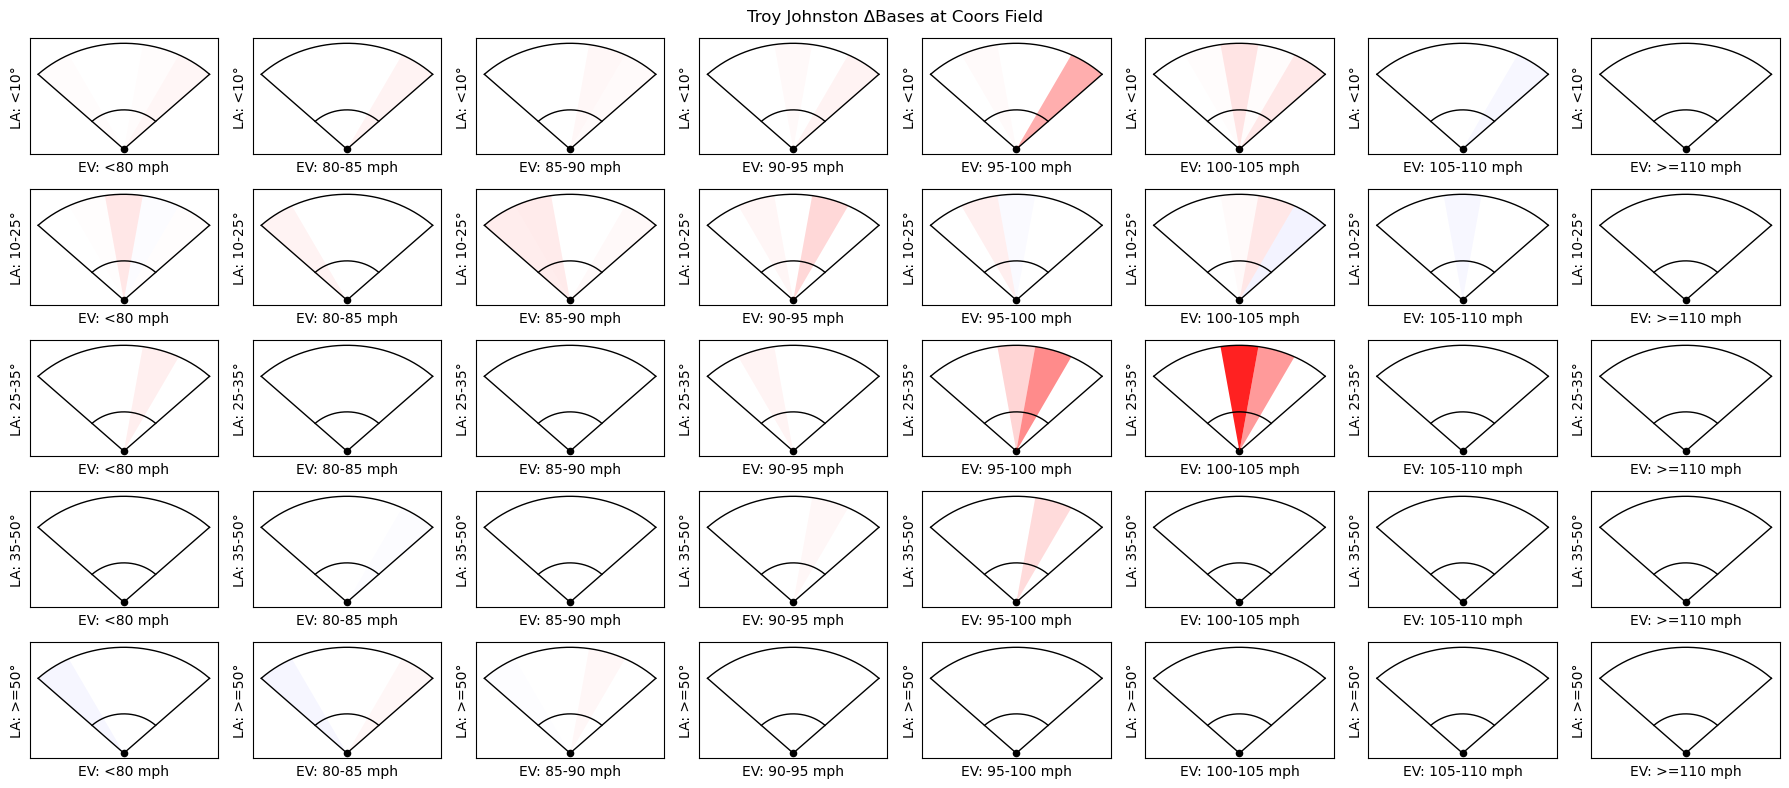

In [38]:
batter_CBB, batter_bb = get_player_dfs('Johnston', 'Troy', home_team=None)

fig, axs = plt.subplots(5, 8, figsize=(18,8))

for i, ev_label in enumerate(ev_labels):
    for j, la_label in enumerate(la_labels):

        # General Plot
        ax = axs[j,i]
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_ylabel(f'LA: {la_label}')
        ax.set_xlabel(f'EV: {ev_label} mph')

        # Get subset
        sub_df = batter_CBB.loc[batter_CBB['EV'] == ev_label].loc[batter_CBB['LA'] == la_label]
        if sub_df.shape[0] == 0:
            ax.axis('off')
            continue
        else:
            draw_field(ax)

        # Add wedges
        for k, r in sub_df.iterrows():
            ran = (int(r['SA'].split()[0]), int(r['SA'].split()[-1][:-1]))
            ax = draw_wedge(ax, ran, val=r['ΔBases'], norm_factor=0.02)
            
fig.suptitle('Troy Johnston ΔBases at Coors Field')
fig.tight_layout()
plt.show()

In [39]:
batter_CBB.head()

,EV,LA,SA,count,ΔHR,Δ3B,Δ2B,Δ1B,ΔOut,ΔBases
0,100-105,25-35°,-9 to 9°,2,0.003059,0.000706,0.001412,-0.000000,-0.005176,0.017412
1,95-100,25-35°,9 to 27°,1,0.000706,0.000353,0.002588,-0.000118,-0.003647,0.009059
2,100-105,25-35°,9 to 27°,1,0.001412,0.000353,0.000706,-0.000000,-0.002471,0.007882
3,95-100,<10°,27 to 45°,6,0.000000,0.000706,-0.000706,0.007059,-0.006353,0.006353
4,95-100,25-35°,-9 to 9°,2,0.000000,0.000941,0.000235,-0.000000,-0.001176,0.003294


## Blaine Crim

Found 39 batted balls for Blaine Crim


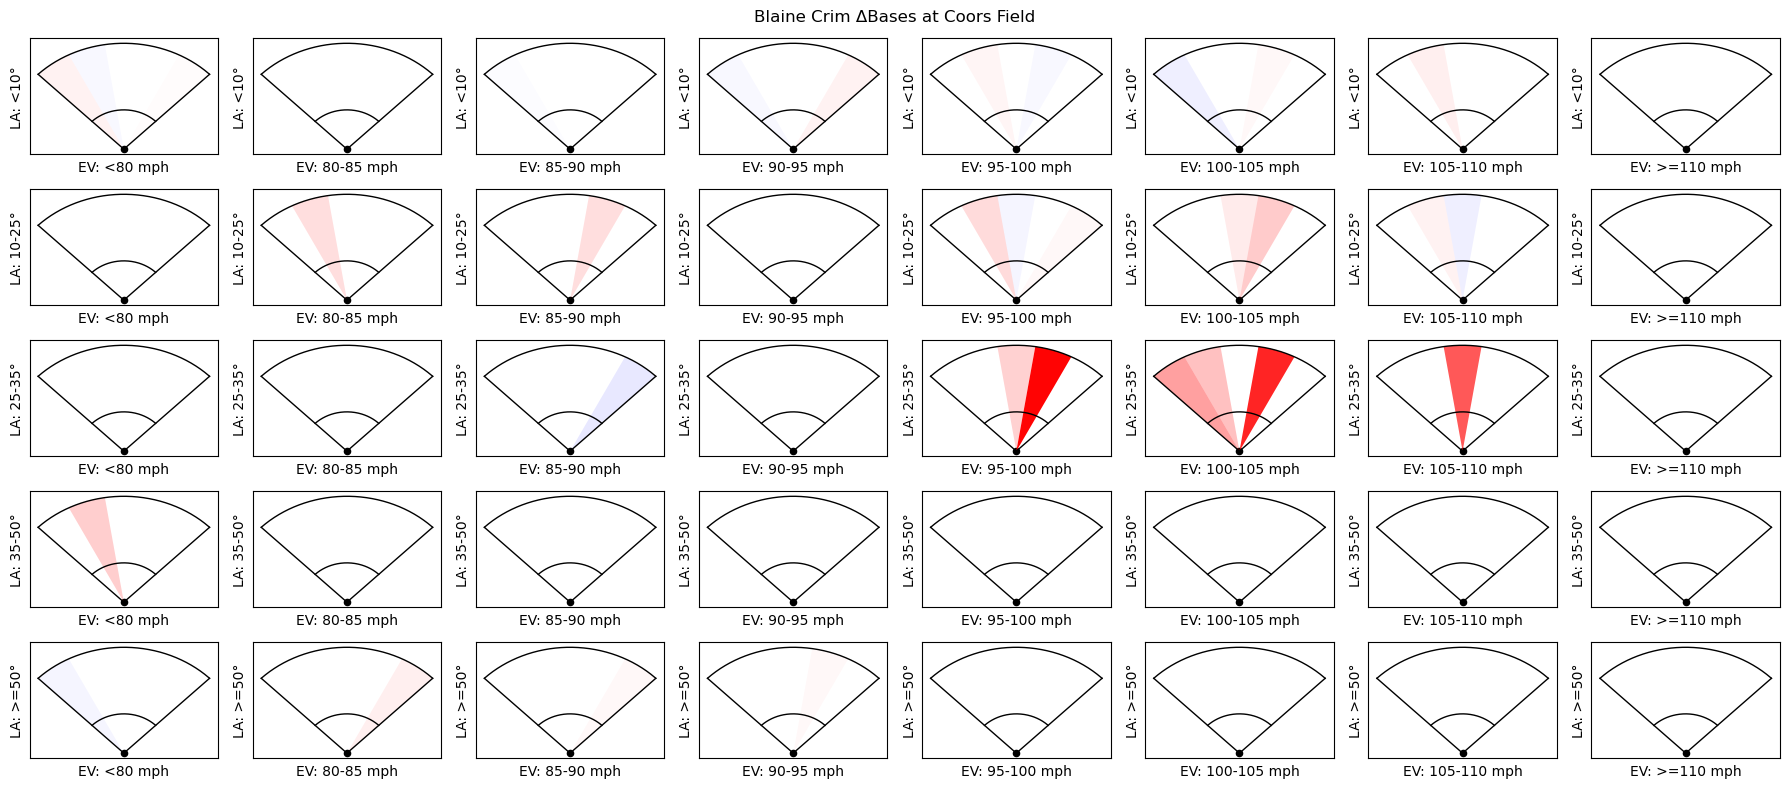

In [40]:
batter_CBB, batter_bb = get_player_dfs('Crim', 'Blaine', home_team=None)

fig, axs = plt.subplots(5, 8, figsize=(18,8))

for i, ev_label in enumerate(ev_labels):
    for j, la_label in enumerate(la_labels):

        # General Plot
        ax = axs[j,i]
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_ylabel(f'LA: {la_label}')
        ax.set_xlabel(f'EV: {ev_label} mph')

        # Get subset
        sub_df = batter_CBB.loc[batter_CBB['EV'] == ev_label].loc[batter_CBB['LA'] == la_label]
        if sub_df.shape[0] == 0:
            ax.axis('off')
            continue
        else:
            draw_field(ax)

        # Add wedges
        for k, r in sub_df.iterrows():
            ran = (int(r['SA'].split()[0]), int(r['SA'].split()[-1][:-1]))
            ax = draw_wedge(ax, ran, val=r['ΔBases'], norm_factor=0.02)
            
fig.suptitle('Blaine Crim ΔBases at Coors Field')
fig.tight_layout()
plt.show()

In [41]:
batter_CBB.head()

,EV,LA,SA,count,ΔHR,Δ3B,Δ2B,Δ1B,ΔOut,ΔBases
0,95-100,25-35°,9 to 27°,1,0.001538,0.000769,0.005641,-0.000256,-0.007949,0.019744
1,100-105,25-35°,9 to 27°,1,0.003077,0.000769,0.001538,-0.000000,-0.005385,0.017179
2,105-110,25-35°,-9 to 9°,1,0.003077,-0.000000,0.000513,-0.000000,-0.003333,0.013077
3,100-105,25-35°,-45 to -27°,1,0.002308,0.000256,-0.001282,-0.000000,-0.001282,0.007436
4,100-105,25-35°,-27 to -9°,1,-0.001026,0.001026,0.003333,-0.000000,-0.003077,0.004872
